# Exercises for Pandas and Jupyter Notebook 

Install

- pip install pandas
- pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load and Display Data 
- Read the CSV file house_price.csv and display the first 2 rows. 

In [2]:
df = pd.read_csv('./data/house_price.csv')

df.head(2)

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
1,2,80,Cool Town,300000


### 2. Show Statistical Summary 
- Display a statistical summary of the dataset to see the mean, standard 
deviation, minimum and maximum values, etc. 

In [3]:
df.describe()

,bedrooms,sq_meter,sales_price
count,5.000000,5.000000,5.000000
mean,2.400000,124.000000,185600.000000
std,1.140175,70.302916,88525.702482
min,1.000000,55.000000,78000.000000
25%,2.000000,80.000000,150000.000000
50%,2.000000,85.000000,150000.000000
75%,3.000000,200.000000,250000.000000
max,4.000000,200.000000,300000.000000


### 3. Filter Data 
- Filter the dataset to show only houses with more than 2 bedrooms. 

In [4]:
filtered_data = df[df['bedrooms'] > 2]

filtered_data

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
4,4,200,Skid Row,150000


### 4. Sort Data 
- Sort the dataset based on the sales price in ascending order.

In [5]:
df.sort_values(by='sales_price', ascending=True)

,bedrooms,sq_meter,neighborhood,sales_price
3,1,55,Normalville,78000
2,2,85,Normalville,150000
4,4,200,Skid Row,150000
0,3,200,Normalville,250000
1,2,80,Cool Town,300000


### 5. Calculate Average Sales Price 
- Calculate the average sales price for all houses. 

In [6]:
average_price = df['sales_price'].mean()
print(f"Average Sales Price: {average_price:.2f}")

Average Sales Price: 185600.00


### 6. Add a New Column 
- Add a new column that shows the price per square meter.

In [7]:
df["sq_meter_price"] = (
    df["sales_price"] / df["sq_meter"]
).round(2)

df.head()

,bedrooms,sq_meter,neighborhood,sales_price,sq_meter_price
0,3,200,Normalville,250000,1250.00
1,2,80,Cool Town,300000,3750.00
2,2,85,Normalville,150000,1764.71
3,1,55,Normalville,78000,1418.18
4,4,200,Skid Row,150000,750.00


In [8]:
# Using apply and round method

df['sq_meter_price'] = df.apply(lambda x: round(x['sales_price'] / x['sq_meter'], 2), axis=1)

df.head()

,bedrooms,sq_meter,neighborhood,sales_price,sq_meter_price
0,3,200,Normalville,250000,1250.00
1,2,80,Cool Town,300000,3750.00
2,2,85,Normalville,150000,1764.71
3,1,55,Normalville,78000,1418.18
4,4,200,Skid Row,150000,750.00


### 7. Group Data 
- Group the dataset by neighborhood and calculate the average sales price for 
each neighborhood. 

In [9]:
average_price_of_neighborhood = df.groupby('neighborhood')['sales_price'].mean().reset_index()
average_price_of_neighborhood

,neighborhood,sales_price
0,Cool Town,300000.000000
1,Normalville,159333.333333
2,Skid Row,150000.000000


### 8. Visualize Data 
- Create a simple bar plot that shows the average sales price per neighborhood. 

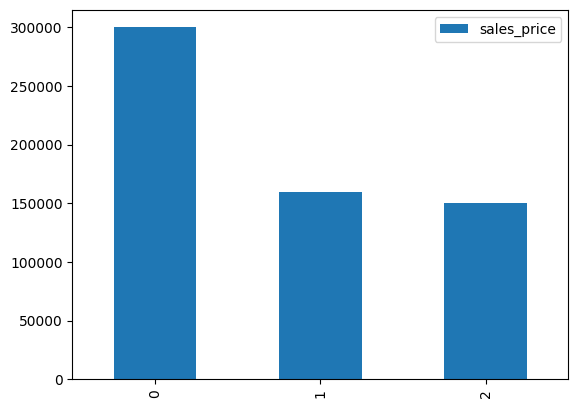

In [10]:
average_price_of_neighborhood.plot(kind='bar')

plt.show()

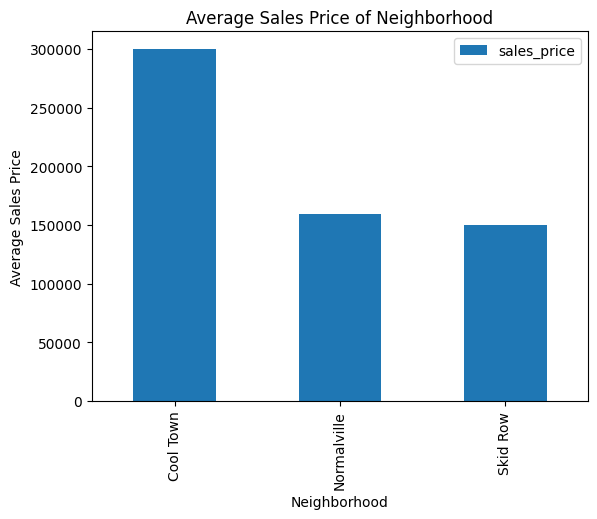

In [11]:
average_price_of_neighborhood.plot(kind='bar', x='neighborhood', y='sales_price')

plt.title('Average Sales Price of Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sales Price')

plt.show()

### 9. Find Maximum Values 
- Find the house with the highest sales price. 

In [12]:
max_price = df.loc[df['sales_price'].idxmax()]

max_price

bedrooms                  2
sq_meter                 80
neighborhood      Cool Town
sales_price          300000
sq_meter_price       3750.0
Name: 1, dtype: object

In [13]:
max_price = df[df['sales_price'] == df['sales_price'].max()]

max_price

,bedrooms,sq_meter,neighborhood,sales_price,sq_meter_price
1,2,80,Cool Town,300000,3750.0


### 10. Export Data 
- Export the manipulated DataFrame to a new CSV file. 

In [14]:
df.to_csv('./data/house_price_with_price_per_sqm.csv', index=False) 